<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/TG1_2_3_JS10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rio Tri Prayogo - 2341720236 - TI 3F/25**
---
## **JS10 - Klasifikasi 1**

### **Tugas Lab 1**

1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai yang terbaik? Lampirkan grafika analisis dan alasan Anda.

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Load Data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/voice.csv')
data['label'] = data['label'].map({'male': 0, 'female': 1})

Analisis Fitur Terbaik

In [3]:
correlations = data.corr()['label'].abs().sort_values(ascending=False)
best_features = correlations[1:7].index.tolist()

print("6 Fitur Terbaik:")
for i, feature in enumerate(best_features, 1):
    print(f"{i}. {feature}: {correlations[feature]:.4f}")

6 Fitur Terbaik:
1. meanfun: 0.8339
2. IQR: 0.6189
3. Q25: 0.5115
4. sp.ent: 0.4906
5. sd: 0.4795
6. sfm: 0.3575


Persiapan Data

In [4]:
X = data[best_features]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mencari k Optimal

In [5]:
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}: {acc:.4f}")

k=1: 0.9748
k=2: 0.9790
k=3: 0.9779
k=4: 0.9779
k=5: 0.9811
k=6: 0.9790
k=7: 0.9821
k=8: 0.9769
k=9: 0.9811
k=10: 0.9790
k=11: 0.9800
k=12: 0.9790
k=13: 0.9758
k=14: 0.9758
k=15: 0.9769


Visualisasi

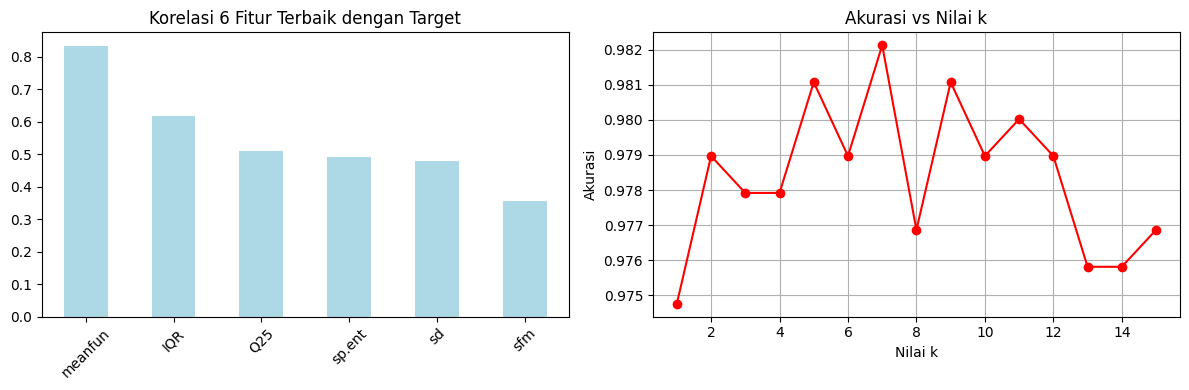

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# Plot korelasi fitur
correlations[1:7].plot(kind='bar', color='lightblue')
plt.title('Korelasi 6 Fitur Terbaik dengan Target')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Plot akurasi vs k
plt.plot(k_values, accuracies, marker='o', color='red')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.title('Akurasi vs Nilai k')
plt.grid(True)

plt.tight_layout()
plt.show()

Hasil Terbaik

In [7]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"HASIL TERBAIK")
print(f"Fitur: {best_features}")
print(f"k optimal: {best_k}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")

HASIL TERBAIK
Fitur: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm']
k optimal: 7
Akurasi terbaik: 0.9821


Model Final

In [8]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)
final_pred = final_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, final_pred)

print(f"Model Final - k={best_k}: {final_accuracy:.4f}")

Model Final - k=7: 0.9821


Berdasarkan hasil pengerjaan diatas, hasil optimal fitur yang memiliki korelasi tinggi yaitu 'meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm' dengan nilai k terbaik 7 menghasilkan akurasi sebesar 98.21%

### **Tugas Lab 2**

- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur CountVectorizer dengan mengaktifkan stop_words
3. Evaluasi hasilnya
- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur TF-IDF dengan mengaktifkan stop_words
3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Import Library

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

Load Data

In [10]:
df = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

Convert Label

In [11]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

Split Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

Model dengan CountVectorizer

In [13]:
# CountVectorizer with stop words
count_vect = CountVectorizer(stop_words='english')
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

# Train model
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)

# Predict and evaluate
y_pred_count = nb_count.predict(X_test_count)

print("=== Hasil Count Vectorizer ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_count):.4f}")
print(classification_report(y_test, y_pred_count))

=== Hasil Count Vectorizer ===
Accuracy: 0.9839
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Model dengan TF-IDF

In [14]:
# TF-IDF with stop words
tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Train model
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("=== Hasil TF-IDF ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(classification_report(y_test, y_pred_tfidf))

=== Hasil TF-IDF ===
Accuracy: 0.9668
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Perbandingan

In [15]:
print("=== Perbandingan ===")
print(f"CountVectorizer Accuracy: {accuracy_score(y_test, y_pred_count):.4f}")
print(f"TF-IDF Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")

=== Perbandingan ===
CountVectorizer Accuracy: 0.9839
TF-IDF Accuracy: 0.9668


Fitur terbaik pada kasus data spam.csv adalah CountVectorizer, karena spam sendiri biasanya menggunakan kata yang diulang-ulang sehingga dalam deteksi spam mencari seberapa sering kata muncul. TF-IDF memberi bobot rendah pada kata yang sering muncul, padahal kata-kata tersebut justru menjadi penanda spam sementara CountVectorizer langsung menghitung kemunculan kata tanpa mengurangi bobot kata umum. CountVectorizer juga memiliki akurasi yang lebih tinggi yaitu 98% sedangkan TF-IDF 96%